<a href="https://colab.research.google.com/github/pw3058396/Predict-Fashion-Image-score-by-using-CNN-with-regression-and-classification/blob/main/CNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image regression
*   清單項目
*   清單項目



This tutorial shows how to classify images of flowers using a `tf.keras.Sequential` model and load data using `tf.keras.utils.image_dataset_from_directory`. It demonstrates the following concepts:


* Efficiently loading a dataset off disk.
* Identifying overfitting and applying techniques to mitigate it, including data augmentation and dropout.

This tutorial follows a basic machine learning workflow:

1. Examine and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process

In addition, the notebook demonstrates how to convert a [saved model](../../../guide/saved_model.ipynb) to a [TensorFlow Lite](https://www.tensorflow.org/lite/) model for on-device machine learning on mobile, embedded, and IoT devices.

## Setup

Import TensorFlow and other necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array

## Download and explore the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After downloading, you should now have a copy of the dataset available.

## Load data using a Keras utility

Next, load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the [Load and preprocess images](../load_data/images.ipynb) tutorial.

### Create a dataset

Define some parameters for the loader:

In [3]:
#set the image size
batch_size = 32
img_height = 180
img_width = 180

In [4]:
import csv
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Specify the path of the CSV file
csv_file_path = '/content/drive/MyDrive/Evaluation method for ranking fashion design based on customer rank/Shien_girl NEW_1-5 class.csv'

# Read the CSV file and create a dictionary mapping image filenames to labels
label_dict = {}
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        if len(row) > 0:  # Ensure the row is not empty
            filename = row[0]  # Filename is in the first column
            label = row[5]  # Label is in the seventh column
            if label and label.replace('.', '', 1).isdigit():  # Ensure the label exists and can be converted to a number
                try:
                    label_dict[filename[:10]] = float(label)  # Add the filename and label to the dictionary
                except ValueError:
                    print(f"Invalid value in row: {row}")

# Iterate through the image folder and process each image file
image_folder = '/content/drive/MyDrive/Evaluation method for ranking fashion design based on customer rank/Shien_gril original +generated AI'
images = []
labels = []
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):  # Ensure the filename ends with .jpg
        image_path = os.path.join(image_folder, filename)
        # Load the image
        img_height = 224
        img_width = 224
        img = load_img(image_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        # Retrieve the label from the corresponding dictionary
        labels.append(label_dict.get(filename[:10], 1))  # Remove the .jpg extension from the filename; if no matching label is found in the CSV, assign a default value of -1

# Convert the images and labels into NumPy arrays
images = np.array(images)
labels = np.array(labels)






In [5]:
print(label_dict)

{'1709106741': 5.0, '1709106753': 4.94, '1709106761': 5.0, '1709106773': 4.35, '1709106785': 5.0, '1709106814': 5.0, '1709106823': 5.0, '1709106833': 4.93, '1709106844': 4.95, '1709106854': 4.94, '1709106865': 4.75, '1709106876': 4.45, '1709106886': 3.2, '1709106897': 5.0, '1709106910': 5.0, '1709106920': 4.92, '1709106931': 4.8, '1709106941': 5.0, '1709106952': 4.88, '1709106960': 3.6, '1709106970': 4.41, '1709106978': 4.93, '1709106987': 5.0, '1709106994': 4.95, '1709107000': 4.25, '1709107007': 5.0, '1709107014': 3.89, '1709107023': 5.0, '1709107034': 4.88, '1709107041': 4.75, '1709107048': 4.87, '1709107055': 4.9, '1709107064': 5.0, '1709107071': 5.0, '1709107081': 4.82, '1709107088': 5.0, '1709107094': 5.0, '1709107101': 3.5, '1709107107': 5.0, '1709107114': 5.0, '1709107119': 4.72, '1709107124': 4.87, '1709107131': 4.97, '1709107138': 3.0, '1709107144': 3.14, '1709107150': 4.79, '1709107157': 4.88, '1709107164': 4.89, '1709107171': 4.75, '1709107178': 4.76, '1709107184': 4.94, '1

In [6]:
print(filename)

1711420063.jpg


In [7]:
# Check the labels of the first 10 images
for i in range(10):
    print(f"picture {i+1} 's label': {labels[i]}")



picture 1 's label': 4.75
picture 2 's label': 4.88
picture 3 's label': 4.94
picture 4 's label': 4.45
picture 5 's label': 3.2
picture 6 's label': 5.0
picture 7 's label': 4.8
picture 8 's label': 3.6
picture 9 's label': 5.0
picture 10 's label': 4.95


It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

In [8]:
from sklearn.model_selection import train_test_split

# Assume train_images, test_images, train_labels, and test_labels are the loaded dataset and labels
# Use the train_test_split function to split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Now train_labels and test_labels contain the labels for the training and testing sets, respectively

# Print the size of the training and testing sets
print(f"train_images.shape: {train_images.shape}, train_labels.shape: {train_labels.shape}")
print(f"test_images.shape: {test_images.shape}, test_labels.shape: {test_labels.shape}")


train_images.shape: (686, 224, 224, 3), train_labels.shape: (686,)
test_images.shape: (172, 224, 224, 3), test_labels.shape: (172,)


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [9]:
class_names = train_images
print(class_names)

[[[[  6.   5.   3.]
   [  7.   6.   4.]
   [  7.   6.   4.]
   ...
   [ 24.  23.  19.]
   [ 24.  25.  20.]
   [ 24.  20.  19.]]

  [[  5.   5.   3.]
   [  5.   4.   2.]
   [  8.   4.   1.]
   ...
   [ 24.  23.  19.]
   [ 23.  22.  20.]
   [ 21.  21.  19.]]

  [[  4.   3.   1.]
   [  5.   4.   2.]
   [  5.   4.   0.]
   ...
   [ 23.  22.  18.]
   [ 22.  23.  18.]
   [ 20.  21.  16.]]

  ...

  [[124. 110.  99.]
   [124. 110.  99.]
   [125. 111. 100.]
   ...
   [122. 105.  98.]
   [123. 106.  99.]
   [122. 105.  98.]]

  [[125. 111. 100.]
   [124. 112. 100.]
   [126. 109. 101.]
   ...
   [123. 106.  99.]
   [121. 107.  98.]
   [120. 106.  97.]]

  [[127. 114. 105.]
   [126. 112. 103.]
   [126. 111. 104.]
   ...
   [124. 107. 100.]
   [124. 107.  99.]
   [121. 106.  99.]]]


 [[[199. 201. 200.]
   [199. 201. 200.]
   [199. 201. 200.]
   ...
   [173. 170. 161.]
   [176. 174. 162.]
   [179. 175. 166.]]

  [[199. 201. 200.]
   [200. 202. 201.]
   [199. 201. 200.]
   ...
   [160. 157. 152.]
 

## Visualize the data

Here are the first nine images from the training dataset:

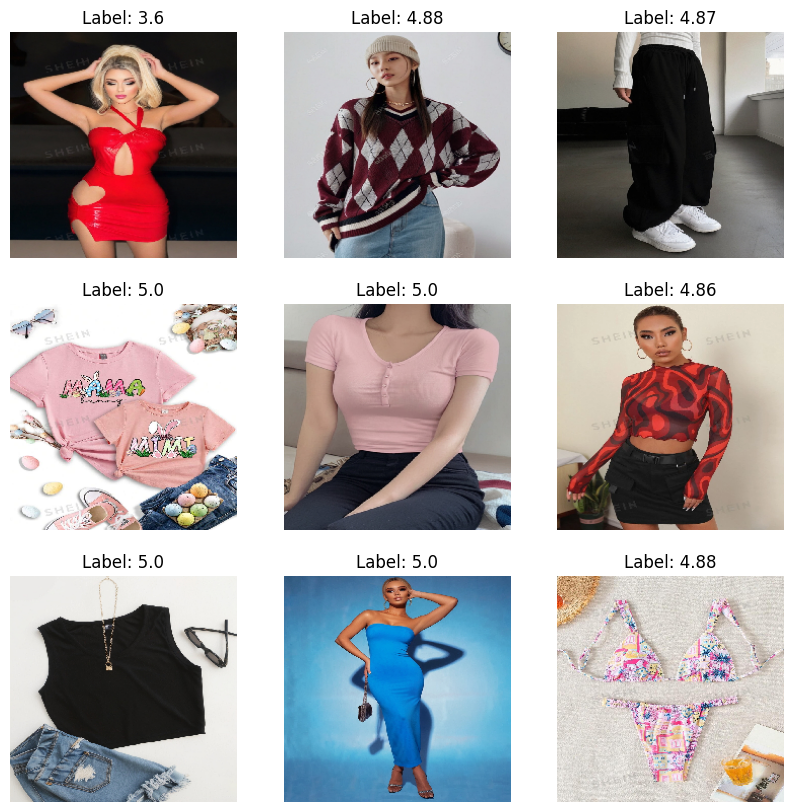

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].astype("uint8"))
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")

plt.show()

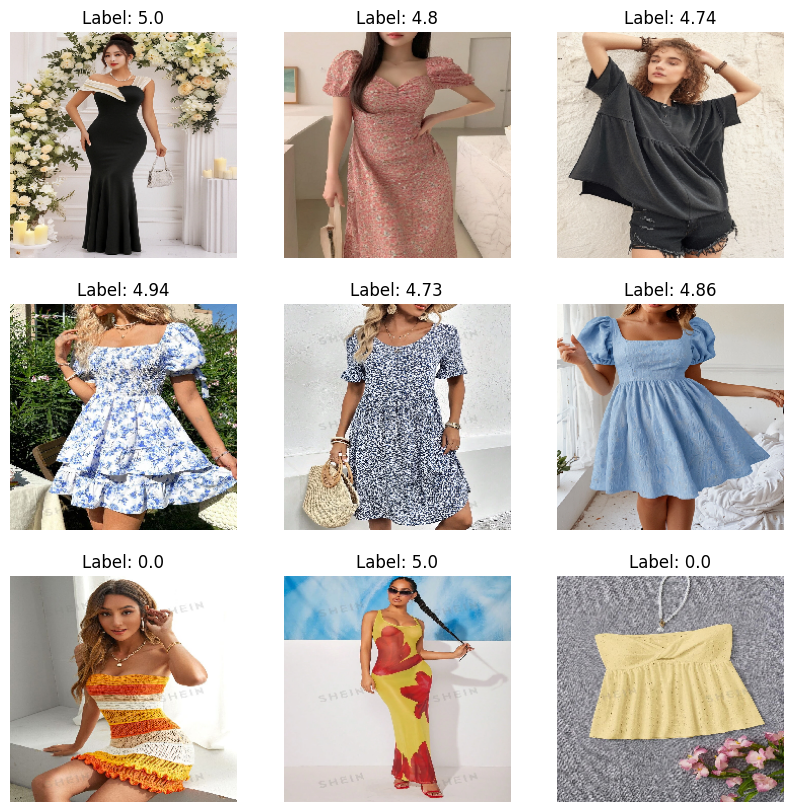

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].astype("uint8"))
    plt.title(f"Label: {test_labels[i]}")
    plt.axis("off")

plt.show()

You will pass these datasets to the Keras `Model.fit` method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

The `image_batch` is a tensor of the shape `(32, 200, 200, 3)`. This is a batch of 32 images of shape `200x200x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


## Configure the dataset for performance

Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the *Prefetching* section of the [Better performance with the tf.data API](../../guide/data_performance.ipynb) guide.

In [12]:
import tensorflow as tf

# Convert NumPy arrays to tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

AUTOTUNE = tf.data.AUTOTUNE

# Apply caching, shuffling, and prefetching to the training dataset
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Apply caching and prefetching to the test dataset
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [ ]:
normalization_layer = layers.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

In [13]:
# Define a normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize the training dataset
normalized_train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

# Retrieve a batch of normalized images and labels
image_batch, labels_batch = next(iter(normalized_train_dataset))

# Get the first normalized image
first_image = image_batch[0]

# Output the minimum and maximum values of the normalized image
print(np.min(first_image), np.max(first_image))



0.7372549 0.9058824


Or, you can include the layer inside your model definition, which can simplify deployment. Use the second approach here.

Note: You previously resized images using the `image_size` argument of `tf.keras.utils.image_dataset_from_directory`. If you want to include the resizing logic in your model as well, you can use the `tf.keras.layers.Resizing` layer.

## A basic Keras model

### Create the model

The Keras [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential(
    [
        RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


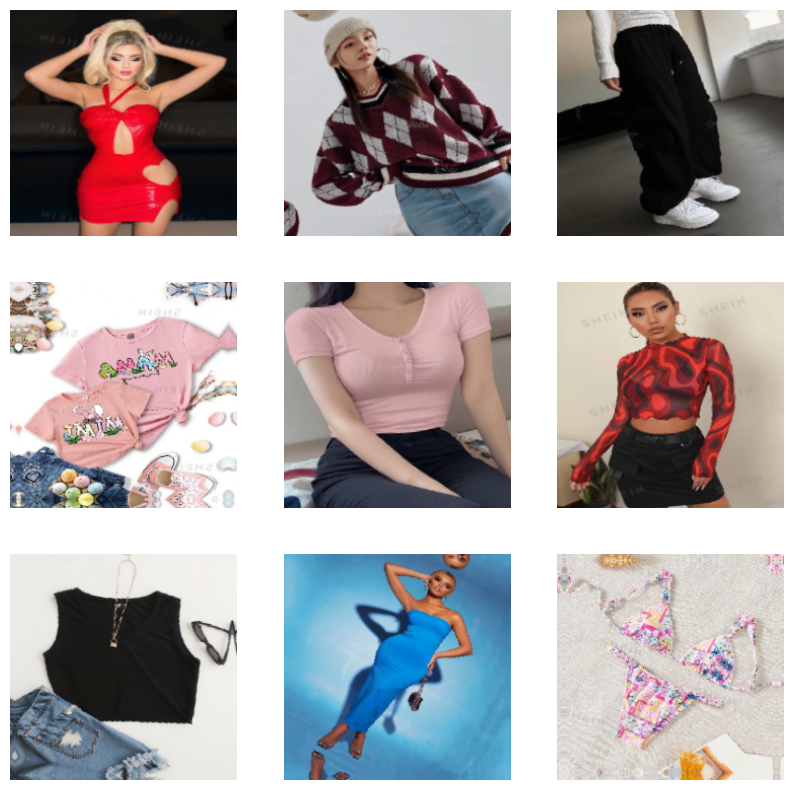

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(train_images[i:i+1])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assume the input image size is 224x224 pixels
img_height, img_width = 224, 224

# Set random seed
# Set random seeds to ensure reproducibility of results
np.random.seed(0)
tf.random.set_seed(0)

# Create a CNN model
# Build a Convolutional Neural Network (CNN) model
model = Sequential([
    data_augmentation,  # Data augmentation layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),  # Flatten multi-dimensional tensor into a one-dimensional tensor
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1)  # Output layer, predicts a single value (the score)
])

# Compile the model
# Configure the model for training
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# View the model structure
# Output a summary of the model's architecture
model.summary()

# Assume we have training data X_train (training images) and y_train (corresponding score labels)
# Assume the loaded training dataset X_train contains images, and y_train contains the corresponding score labels
# X_train shape should be (number of samples, image height, image width, 3), where 3 represents RGB channels
# y_train shape should be (number of samples,), where each element is the score corresponding to an image

# Train the model
# Train the model using the training data
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Assume we have a test dataset X_test (test images) for predictions
# Assume the test dataset X_test contains the images to be predicted
# X_test shape should also be (number of samples, image height, image width, 3)

# Predict scores for test images
# Use the model to predict scores for test images
predictions = model.predict(test_images)

# Print part of the prediction results
# Create a list of image filenames, consistent with those loaded earlier
# Construct a list of filenames corresponding to the test images
image_filenames = []
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):  # Ensure filenames end with .jpg
        # Use the full filename (including extension) as the key, extract the image number from the filename
        # Extract the image number from the filename
        image_number = filename.split('.')[0]
        image_filenames.append(image_number)

# Assume predictions are the results generated by the model for the test images
# Assume the model has made predictions for the test images, and the results are stored in predictions

# Print the predicted score and corresponding filename for each test image
# Iterate through all test image filenames and predictions
predicted_label = []
actual_label = []
for i in range(min(len(image_filenames), len(predictions))):  # Loop through all filenames and prediction results
    image_filename = image_filenames[i]  # Get the i-th image filename (full filename)
    # Get the label corresponding to the image filename
    # Retrieve the actual score for the image (if available)
    actual_score = label_dict.get(image_filename, 'Label not found')
    # Get the predicted score
    # Extract the predicted score
    predicted_score = predictions[i][0]
    # Print the filename, predicted score, and actual label (if available)
    # Store predicted and actual labels
    predicted_label.append(predicted_score)
    actual_label.append(actual_score)
    print(f"Image Filename: {image_filename}, Predicted Score: {predicted_score}, Actual Label: {actual_label}")

# Save the model
# Save the model, skipping the data augmentation layer to avoid serialization issues
model_without_augmentation = Sequential(model.layers[1:])  # Skip the data_augmentation layer
model_without_augmentation.save("fashion_rating_model_without_augmentation.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 2418399.5000 - mae: 639.1349 - val_loss: 5.3556 - val_mae: 2.2519
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 14.0869 - mae: 3.1703 - val_loss: 11.7270 - val_mae: 2.8642
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 18.7002 - mae: 3.6951 - val_loss: 11.1482 - val_mae: 3.2813
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 14.0323 - mae: 3.2781 - val_loss: 7.7462 - val_mae: 2.7477
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 13.6737 - mae: 3.0771 - val_loss: 6.4987 - val_mae: 2.5139
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 12.2808 - mae: 2.7649 - val_loss: 6.0611 - val_mae: 2.4254
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 12.0963 - mae: 2.7043 - val_loss: 6.2116 - val_mae: 2.4576
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 11.8256 - mae: 2.6694 - val_loss: 7.1719 - val_mae: 2.6471
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image Filename: 1709106865, Predicted Score: 3.1604228019714355, Actual Label: [4.75]
Image Filename: 1709106952, Predicted Score: 2.551898956298828, Actual Label: [4.75, 4.88]
Image Filename: 1709106854, Predicted Score: 2.737786293029785, Actual Label: [4.75, 4.88, 4.94]
Image Filename: 1709106876, Predicted Score: 3.6098287105560303, Actual Label: [4.75, 4.88, 4.94, 4.45]
Image Filename: 1709106886, Predicted Score: 3.854684591293335, Actual Label: [4.75, 4.88, 4.94, 4.45, 3.2]
Image Filename: 1709106910, Predicted Score: 2.61027193069458, Actual Label: [4.75, 4.88, 4.94, 4.45, 3.2, 5.0]
Image Filename: 1709106931, Predicted Score: 2.8628439903259277, Actual Label: [4.75, 4.88, 4.94, 4.45, 3.2, 5.0, 4.8]
Image Filename: 1709106960, Predicted Score: 2.7208943367004395, Actual Label: [4.75, 4.88, 4.94, 4.45, 3.2, 5.0, 4.8, 3.6]
Image Filename: 1709106987, Predicted Score: 2.8215198516845703, Actual Label: [4.75, 4.88, 4.94, 4.45, 3.2, 5.0, 4.8, 3.

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [21]:
print(predicted_label)
print(actual_label)

[5.2723336, 4.323173, 4.57063, 6.051328, 5.1372457, 4.965065, 5.5619226, 5.1281147, 3.928877, 5.3728814, 3.976907, 4.7489295, 5.804324, 5.1018624, 5.109837, 3.9550571, 5.9853187, 4.803155, 5.1153255, 5.0510683, 4.3189874, 5.272056, 5.6504545, 4.869367, 5.1154065, 4.2538114, 5.551037, 3.6941693, 3.8461463, 4.5302205, 4.9808145, 5.609315, 3.787711, 7.185734, 4.608382, 5.604605, 4.2237787, 4.4292607, 4.7700334, 4.2312727, 3.8667, 4.6702776, 3.7858737, 4.696398, 4.8455176, 5.1186323, 4.9608474, 4.4495034, 4.3128667, 6.3252234, 4.453028, 4.7296925, 4.932371, 4.7072973, 4.7846136, 3.9279845, 4.849083, 3.9406312, 4.4438176, 4.0689974, 5.1805525, 3.8756342, 6.0144267, 4.9837375, 4.526131, 4.6586056, 4.713157, 4.7575436, 3.576909, 4.5560155, 4.4952116, 4.766637, 3.9486845, 4.8111863, 5.0312586, 4.303449, 4.8352532, 4.290423, 4.2119384, 4.5453186, 4.422194, 4.654435, 5.0516806, 4.018317, 4.709442, 4.1333694, 3.3220046, 3.9999578, 3.5304658, 3.815365, 5.3989983, 5.8235617, 4.4273615, 4.3134155, 4

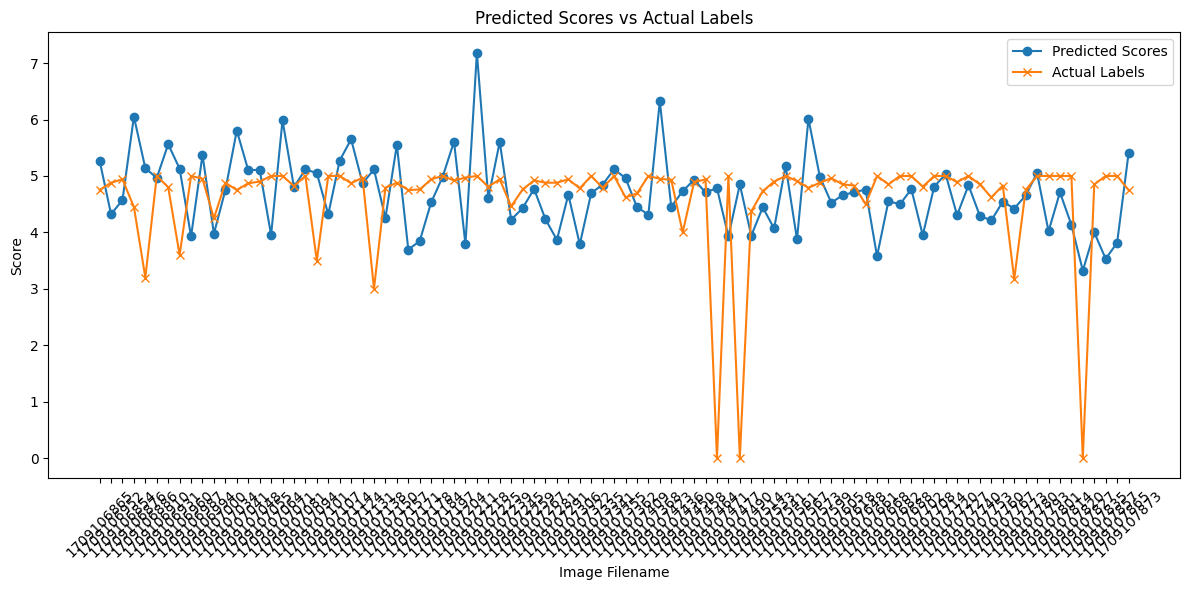

In [22]:
import matplotlib.pyplot as plt

# Select the first 91 image filenames along with their predicted scores and actual labels (if available)
num_samples = 91
sample_filenames = image_filenames[:num_samples]
sample_predictions = predictions[:num_samples]
sample_actual_labels = [label_dict.get(filename, 'Label not found') for filename in sample_filenames]

# Plot a comparison of predicted scores and actual labels
plt.figure(figsize=(12, 6))
plt.plot(sample_filenames, sample_predictions, label='Predicted Scores', marker='o')  # Plot predicted scores
plt.plot(sample_filenames, sample_actual_labels, label='Actual Labels', marker='x')  # Plot actual labels
plt.xlabel('Image Filename')  # Label for the x-axis
plt.ylabel('Score')  # Label for the y-axis
plt.title('Predicted Scores vs Actual Labels')  # Chart title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend to the chart
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the chart


In [23]:
print(len(actual_label))
print(len(predicted_label))

172
172


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Replace values of 0.0 in actual_labels with the corresponding predicted scores
actual_labels = [pred if label == 0.0 else label for label, pred in zip(actual_label, predicted_label)]

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_labels, predicted_label)
print("Mean Squared Error (MSE):", mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_labels, predicted_label)
print("Mean Absolute Error (MAE):", mae)

# Calculate the R² score
r2 = r2_score(actual_labels, predicted_label)
print("R² Score:", r2)




Mean Squared Error (MSE): 4.3835469850132895
Mean Absolute Error (MAE): 1.967795656503633
R² Score: -8.687644143645258


In [30]:
# Make the predicted scores fall within the range of 1 to 5
import numpy as np

# Use np.clip to limit predicted scores to the range 1 to 5
predicted_scores_clipped = np.clip(predicted_label, 1, 5)

# Calculate statistics for the clipped predicted scores
min_score = np.min(predicted_scores_clipped)  # Minimum score
max_score = np.max(predicted_scores_clipped)  # Maximum score
mean_score = np.mean(predicted_scores_clipped)  # Mean score
std_score = np.std(predicted_scores_clipped)  # Standard deviation

# Print the statistics
print(f"Min Predicted Score (Clipped): {min_score}")
print(f"Max Predicted Score (Clipped): {max_score}")
print(f"Mean Predicted Score (Clipped): {mean_score}")
print(f"Std Deviation of Predicted Scores (Clipped): {std_score}")

# Print the clipped predicted scores
print(predicted_scores_clipped)



Min Predicted Score (Clipped): 1.9119791984558105
Max Predicted Score (Clipped): 3.854684591293335
Mean Predicted Score (Clipped): 2.6834053993225098
Std Deviation of Predicted Scores (Clipped): 0.34054186940193176
[3.1604228 2.551899  2.7377863 3.6098287 3.8546846 2.610272  2.862844
 2.7208943 2.8215199 3.0310638 2.3910751 2.6799161 2.6659808 2.5420566
 2.8926537 2.2677553 2.8328009 2.4710782 3.0534873 2.8983338 2.1095357
 2.9036233 2.585364  2.6122353 2.447694  2.5926356 3.2463605 2.5922756
 2.4144635 2.537788  2.6144104 3.0913055 2.3486948 3.3052468 2.5743792
 3.2554903 2.446627  2.8015652 3.1486986 2.2854757 2.047187  2.718325
 2.2302635 2.6777165 2.8186474 2.769744  3.1310542 2.9664156 2.3203127
 2.9012895 2.5772622 3.0169806 2.9803236 2.9597456 2.6358542 2.656372
 3.077426  2.340141  2.8204055 2.6267762 3.2550395 2.0029285 2.9261014
 2.6032202 2.620457  2.3910139 2.835393  2.6149368 2.506153  2.7976494
 2.624766  2.77517   2.4429486 3.0678592 2.6731179 2.3921828 2.3593009
 2.5883

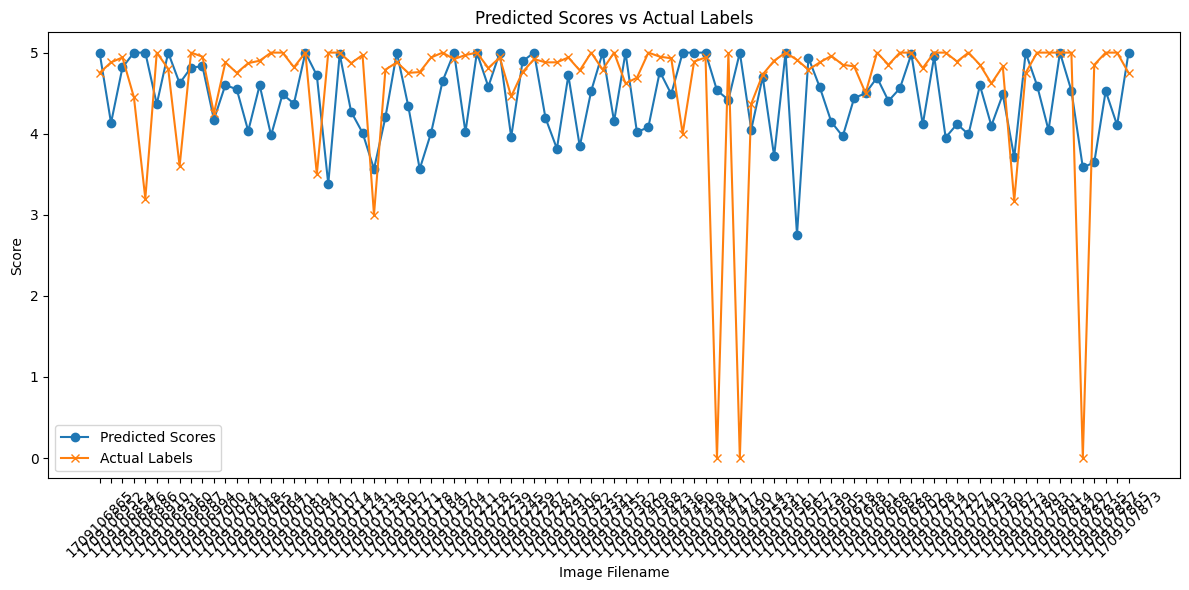

In [ ]:
import matplotlib.pyplot as plt

# Select the first 91 image filenames along with their clipped predicted scores and actual labels (if available)
num_samples = 91
sample_filenames = image_filenames[:num_samples]
sample_predictions = predicted_scores_clipped[:num_samples]
sample_actual_labels = [label_dict.get(filename, 'Label not found') for filename in sample_filenames]

# Plot a comparison of clipped predicted scores and actual labels
plt.figure(figsize=(12, 6))
plt.plot(sample_filenames, sample_predictions, label='Predicted Scores', marker='o')  # Plot predicted scores
plt.plot(sample_filenames, sample_actual_labels, label='Actual Labels', marker='x')  # Plot actual labels
plt.xlabel('Image Filename')  # Label for the x-axis
plt.ylabel('Score')  # Label for the y-axis
plt.title('Predicted Scores vs Actual Labels')  # Chart title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend to the chart
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the chart


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Replace 0.0 labels in actual_labels with the corresponding clipped predicted scores
actual_labels = [pred if label == 0.0 else label for label, pred in zip(actual_labels, predicted_scores_clipped)]

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_labels, predicted_scores_clipped)
print("Mean Squared Error (MSE):", mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_labels, predicted_scores_clipped)
print("Mean Absolute Error (MAE):", mae)

# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the MAPE
mape = mean_absolute_percentage_error(actual_labels, predicted_scores_clipped)
print("Mean Absolute Percentage Error (MAPE):", mape)









Mean Squared Error (MSE): 1.6519885352479635
Mean Absolute Error (MAE): 1.0764933653210484
Mean Absolute Percentage Error (MAPE): 22.168077462838365
